# Projeto de dados do mercado financeiro

Neste projeto de dados, nos concentraremos na análise de dados exploratórios dos preços das ações. Este projeto faz parte de uma atividade do curso "Python para Data Science e Machine Learning".
____
Vamos nos concentrar nas ações dos banco e ver como eles performaram desde a crise financeira até o início de 2020.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

/home/andre/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Dados

Precisamos obter dados usando o datareader de pandas. Obteremos informações sobre ações para os seguintes bancos:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [2]:
## Os dados vão de 01-01-2006 até 01-01-2020
ini = datetime(2006,1,1)
fim = datetime(2020,1,1)

In [3]:
## Lendo as informações de cada banco
BAC = data.DataReader('BAC','yahoo',ini,fim)
C = data.DataReader('C','yahoo',ini,fim)
GS = data.DataReader('GS','yahoo',ini,fim)
JPM = data.DataReader('JPM','yahoo',ini,fim)
MS = data.DataReader('MS','yahoo',ini,fim)
WFC = data.DataReader('WFC','yahoo',ini,fim)

In [4]:
## Lista dos símbolos dos tickers de cada banco
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [5]:
bancos = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

In [6]:
## Definindo os níveis dos nomes das colunas
bancos.columns.names = ['Banco','Info']

In [7]:
bancos.head()

Banco             BAC                                                          \
Info             High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.968796   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.916302   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.938789   

Banco                C                                      ...         MS  \
Info              High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

Banco                                              WFC                        \
Info            Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.429329  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.455013  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.557716  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.596241  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.994202  31.825001  31.555000  31.674999   

Banco                                         
Info            Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.408512  
2006-01-04  31.530001  10870000.0  20.171795  
2006-01-05  31.495001  10158000.0  20.149401  
2006-01-06  31.680000   8403800.0  20.267757  
2006-01-09  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

** Qual é o preço máximo de fechamento para cada banco durante todo o período? **

In [8]:
bancos.xs(key='Close',level='Info',axis=1).max()

Banco
BAC     54.900002
C      564.099976
GS     273.380005
JPM    139.399994
MS      89.300003
WFC     65.930000
dtype: float64

**DataFrame dos retornos dos bancos, normalmente dado por:**
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
retornos = pd.DataFrame(index=bancos.index)

In [10]:
for ticker in tickers:
    retornos[ticker + ' Return'] = bancos[ticker]['Close'].pct_change()

In [11]:
retornos.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


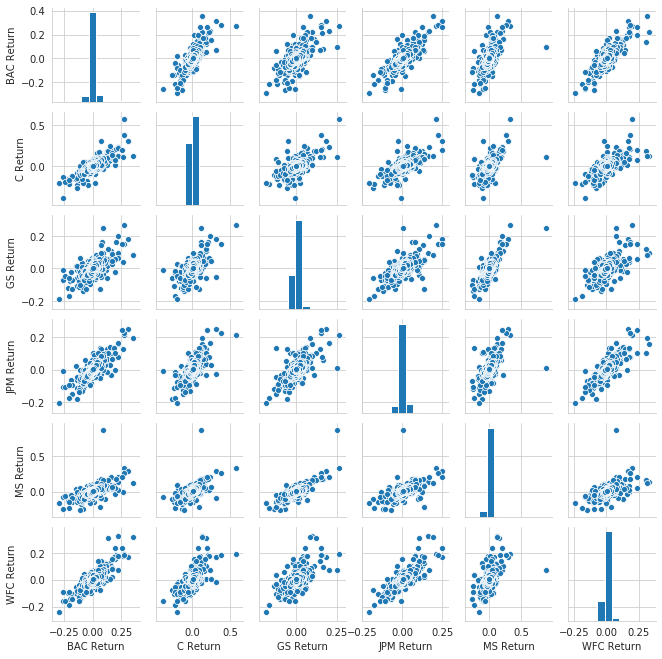

In [12]:
sns.pairplot(retornos,height=1.5)

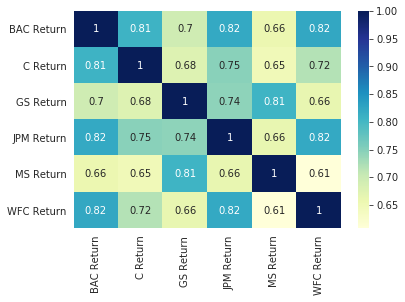

In [13]:
sns.heatmap(retornos.corr(),annot=True,cmap='YlGnBu')

*Aqui podemos ver uma maior correlação de retorno entre os bancos:*
    * CitiGroup e o Banco da América
    * JPMorgan Chase e o Banco da América
    * Morgan Stanley e Goldman Sachs
    * Wells Fargo e o Banco da América
    * Wells Fargo e JPMorgan Chase

**Melhores e piores dias de retorno de cada banco**

In [14]:
data_melhor = list(retornos.idxmax().values)
data_pior = list(retornos.idxmin().values)
melhor = list(retornos.max())
pior = list(retornos.min())

In [15]:
df = pd.DataFrame(columns=['Banco','Data Melhor','Melhor','Data Pior','Pior'])
df['Banco'] = tickers
df['Data Melhor'] = data_melhor
df['Melhor'] = melhor
df['Data Pior'] = data_pior
df['Pior'] = pior
df

,Banco,Data Melhor,Melhor,Data Pior,Pior
0,BAC,2009-04-09,0.352691,2009-01-20,-0.289694
1,C,2008-11-24,0.578249,2009-02-27,-0.390244
2,GS,2008-11-24,0.264678,2009-01-20,-0.189596
3,JPM,2009-01-21,0.250967,2009-01-20,-0.207274
4,MS,2008-10-13,0.869835,2008-10-09,-0.258929
5,WFC,2008-07-16,0.327645,2009-01-20,-0.238223


*No dia 20-01-2009, o pior dia de retorno de 4 dos 6 bancos, foi o dia que Barack Obama tomou posse como presidente dos EUA.* \
*Um dia depois, a JPMorgan Chase, mesma empresa que registrou seu pior retorno durante esse período, registra seu melhor retorno em todos esses anos.* 


** Dê uma olhada no desvio padrão dos retornos. Qual ação você classificaria como a mais arriscada durante todo o período de tempo? Qual você classificaria como a mais arriscado para o ano 2015? **

In [16]:
retornos.std()

BAC Return    0.032158
C Return      0.033750
GS Return     0.022946
JPM Return    0.024401
MS Return     0.033176
WFC Return    0.026551
dtype: float64

In [17]:
retornos.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

*O banco com a ação mais arriscada em todo esse período seria o CitiGroup, com um desvio padrão de 0.038, sendo o maior entre os 6 bancos listados.* \
*No ano de 2015, a ação mais arriscada foi do banco Morgan Stanley, com um desvio padrão de 0.016.* \
*E o menos arriscado para se investir em 2015, seria o Wells Fargo, com um desvio de 0.012.*

** Crie um distplot usando seaborn dos retornos de 2015 para Morgan Stanley **

In [18]:
MS_2015 = retornos.loc['2015-01-01':'2015-12-31']['MS Return']

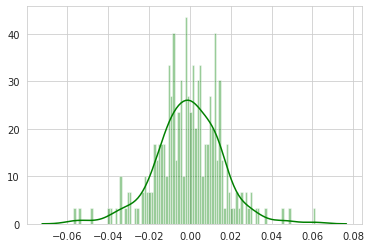

In [19]:
sns.distplot(MS_2015.values,bins=100,color='green')

** Crie um distplot usando seaborn dos retornos de 2008 para CitiGroup **

In [20]:
C_2015 = retornos.loc['2008-01-01':'2008-12-31']['C Return']

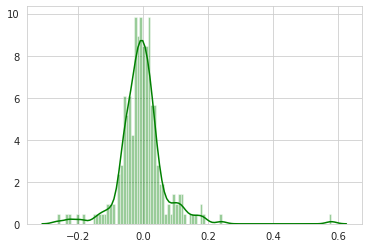

In [21]:
sns.distplot(C_2015.values,color='green',bins=100)

** Crie um gráfico de linha mostrando o preço de fechamento para cada banco para todo o índice de tempo. **

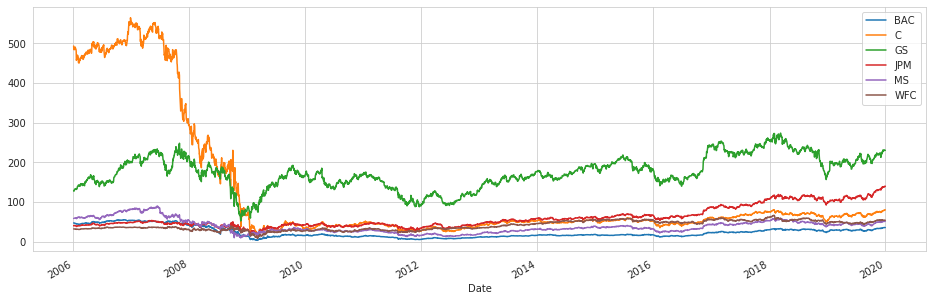

In [22]:
plt.figure(figsize=(16,5))
for ticker in tickers:
    bancos[ticker]['Close'].plot(label=ticker)
plt.legend(fontsize='medium')

*Podemos perceber que durante esse tempo os bancos que tiveram uma maior variação no preço de fechamneto das ações foram CitiGroup e Goldman Shacs.*

## Médias móveis

Vamos analisar as médias móveis para essas ações no ano de 2008.

** Trace a média de 30 dias para o preço do Bank Of America para o ano de 2008 **

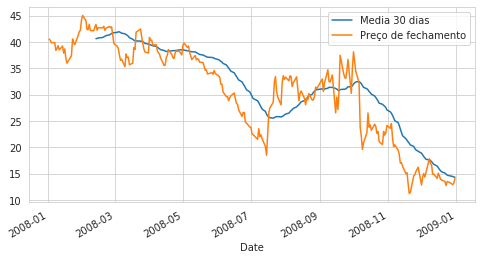

In [23]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
bancos['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='Media 30 dias')
bancos['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='Preço de fechamento')
plt.legend()

** Crie um mapa de calor da correlação entre os preços de fechamento das ações. **

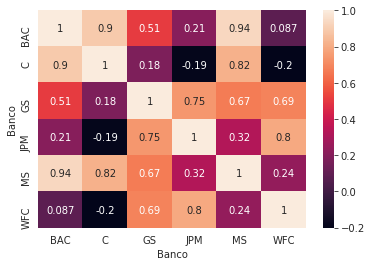

In [24]:
sns.heatmap(bancos.xs(key='Close',level='Info',axis=1).corr(),annot=True)

** Opcional: use o clustermap do seaborn para agrupar as correlações: **

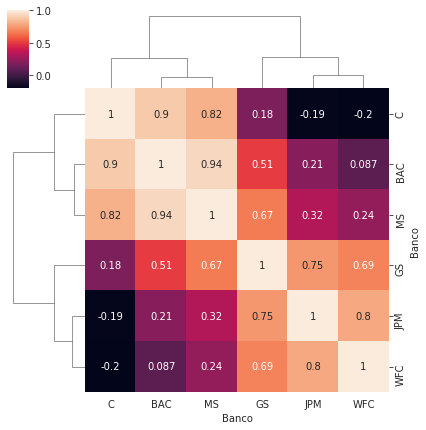

In [25]:
sns.clustermap(bancos.xs(key='Close',level='Info',axis=1).corr(),annot=True,figsize=(6,6))

*Podemos identificar uma forte correlação no preço de fechamento das ações entre os bancos:*
    * CitiGroup e o Banco da América
    * CitiGroup e Morgan Style
    * Banco da América e JPMorgan Chase.